In [12]:
import os
import pickle as pkl
import scipy.spatial.distance as scipy_dist
import pandas as pd

In [2]:
rootdir = "/mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_color_sweep"

In [3]:
colors = os.listdir(rootdir)

In [4]:
results = {}
for c in colors:
    p = os.path.join(rootdir, c)
    for m in os.listdir(p):
        if m not in results: 
            results[m] = []
        full_path = os.path.join(p, m, "lime.pkl")
        if os.path.exists(full_path):
            with open(full_path, 'rb') as f:
                results[m].append(pkl.load(f)['lime_ordering'])

In [5]:
import numpy as np
R = np.stack(results['deit_small_resnet_aug'])

In [6]:
all_random = []
for _ in range(8):
    random = []
    for _ in range(10000):
        arr = np.arange(196)
        np.random.shuffle(arr)
        random.append(arr)
    all_random.append(np.stack(random))
all_random = np.stack(all_random)

In [7]:
all_random.shape

(8, 10000, 196)

In [8]:
from functools import reduce

In [9]:
def get_jaccards(R):
    num_features = 50
    mega_all_ious = []
    for b in range(10000):
        if b % 1000 == 0:
            print(b)
        all_ious = []
        for T in range(1, num_features):
            mask = np.zeros((8, 196))
            np.put_along_axis(mask, R[:, b, :T], 1, axis=1)
            all_ious.append(1-scipy_dist.pdist(mask, metric='jaccard'))
        mega_all_ious.append(all_ious)
    mega_all_ious = [np.stack(u) for u in mega_all_ious]
    mega_all_ious = np.stack(mega_all_ious)
    mega_all_ious = mega_all_ious.mean(axis=0)
    df = pd.DataFrame(mega_all_ious)
    df['K'] = np.arange(1, num_features)
    melted = df.melt('K').drop('variable', axis=1)
    return melted

In [10]:
# def get_jaccards(R):
#     mega_all_ious = []
#     for b in range(10000):
#         if b % 1000 == 0:
#             print(b)
#         all_ious = []
#         for T in range(1, 196):
#             mask = np.zeros((8, 196))
#             np.put_along_axis(mask, R[:, b, :T], 1, axis=1)
#             all_ious.append(1-scipy_dist.pdist(mask, metric='jaccard').mean())
#         mega_all_ious.append(all_ious)
#     mega_all_ious = np.stack(mega_all_ious)
#     jaccards = mega_all_ious.mean(axis=0)
#     return jaccards

In [13]:
resnet_jaccards = get_jaccards(np.stack(results['resnet50']))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [14]:
transformer_jaccards = get_jaccards(np.stack(results['deit_small_resnet_aug']))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [15]:
random_jaccards = get_jaccards(all_random)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set(style='ticks', font='sans-serif')
plt.style.use('ggplot')

In [17]:
vit_style = ['ViT-S (masking pixels)', 'green']
vit_miss_style = ['ViT-S (dropping tokens)', 'blue']
resnet_style = ['ResNet-50', 'red']
random_style = ['Random', 'gray']

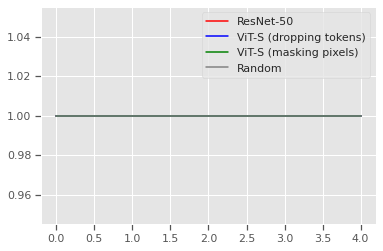

In [18]:
def get_handles():
    fig, ax = plt.subplots(1, 1)
    dummy_x = np.arange(5)
    dummy_y = np.ones(5)
    for model_name, color in [resnet_style, vit_miss_style, vit_style, random_style]:
        sns.lineplot(x=dummy_x, y=dummy_y, color=color, linestyle='-', label=model_name, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    plt.show()
    return handles, labels
handles, labels = get_handles()
# print(handles[0].__dict__)

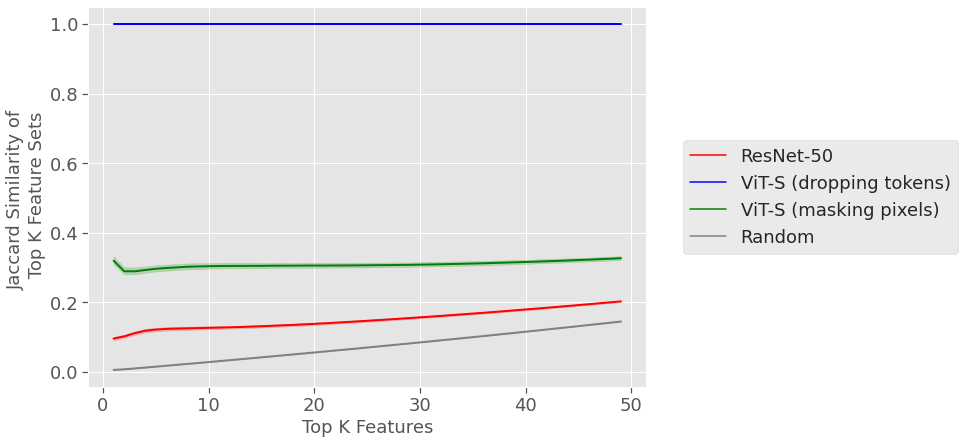

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10,7))
sns.lineplot(x=np.arange(1, 50), y=np.ones(49), linewidth=2, label=vit_miss_style[0], color=vit_miss_style[1], ax=ax)
sns.lineplot(data=transformer_jaccards, x='K', y='value', linewidth=2, color=vit_style[1], ax=ax)
sns.lineplot(data=resnet_jaccards, x='K', y='value', linewidth=2, color=resnet_style[1], ax=ax)
sns.lineplot(data=random_jaccards, x='K', y='value', linewidth=2, label=random_style[0], color=random_style[1], ax=ax)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlabel('Top K Features', fontsize=18)
plt.ylabel('Jaccard Similarity of \n Top K Feature Sets', fontsize=18)
plt.legend(handles,labels, frameon=True, fontsize=18, bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.savefig("consistency.pdf", bbox_inches='tight')
plt.show()

In [46]:
# print(transformer_jaccards.groupby('K').mean()['value'].tolist())
print(np.ones(49).tolist())

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [102]:
import scipy.spatial.distance.pdist as pdist

ModuleNotFoundError: No module named 'scipy.spatial.distance.pdist'; 'scipy.spatial.distance' is not a package

In [106]:
import scipy.spatial.distance.pdist as pdist

ModuleNotFoundError: No module named 'scipy.spatial.distance.pdist'; 'scipy.spatial.distance' is not a package

In [118]:
dst.pdist([[0, 0, 1], [0, 0, 1]], metric='jaccard')

array([1.])